In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\data science projects\diabetes datasets\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Insulin'>

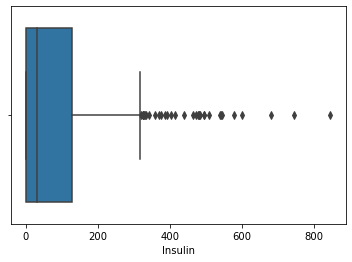

In [9]:
sns.boxplot(df['Insulin'])

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


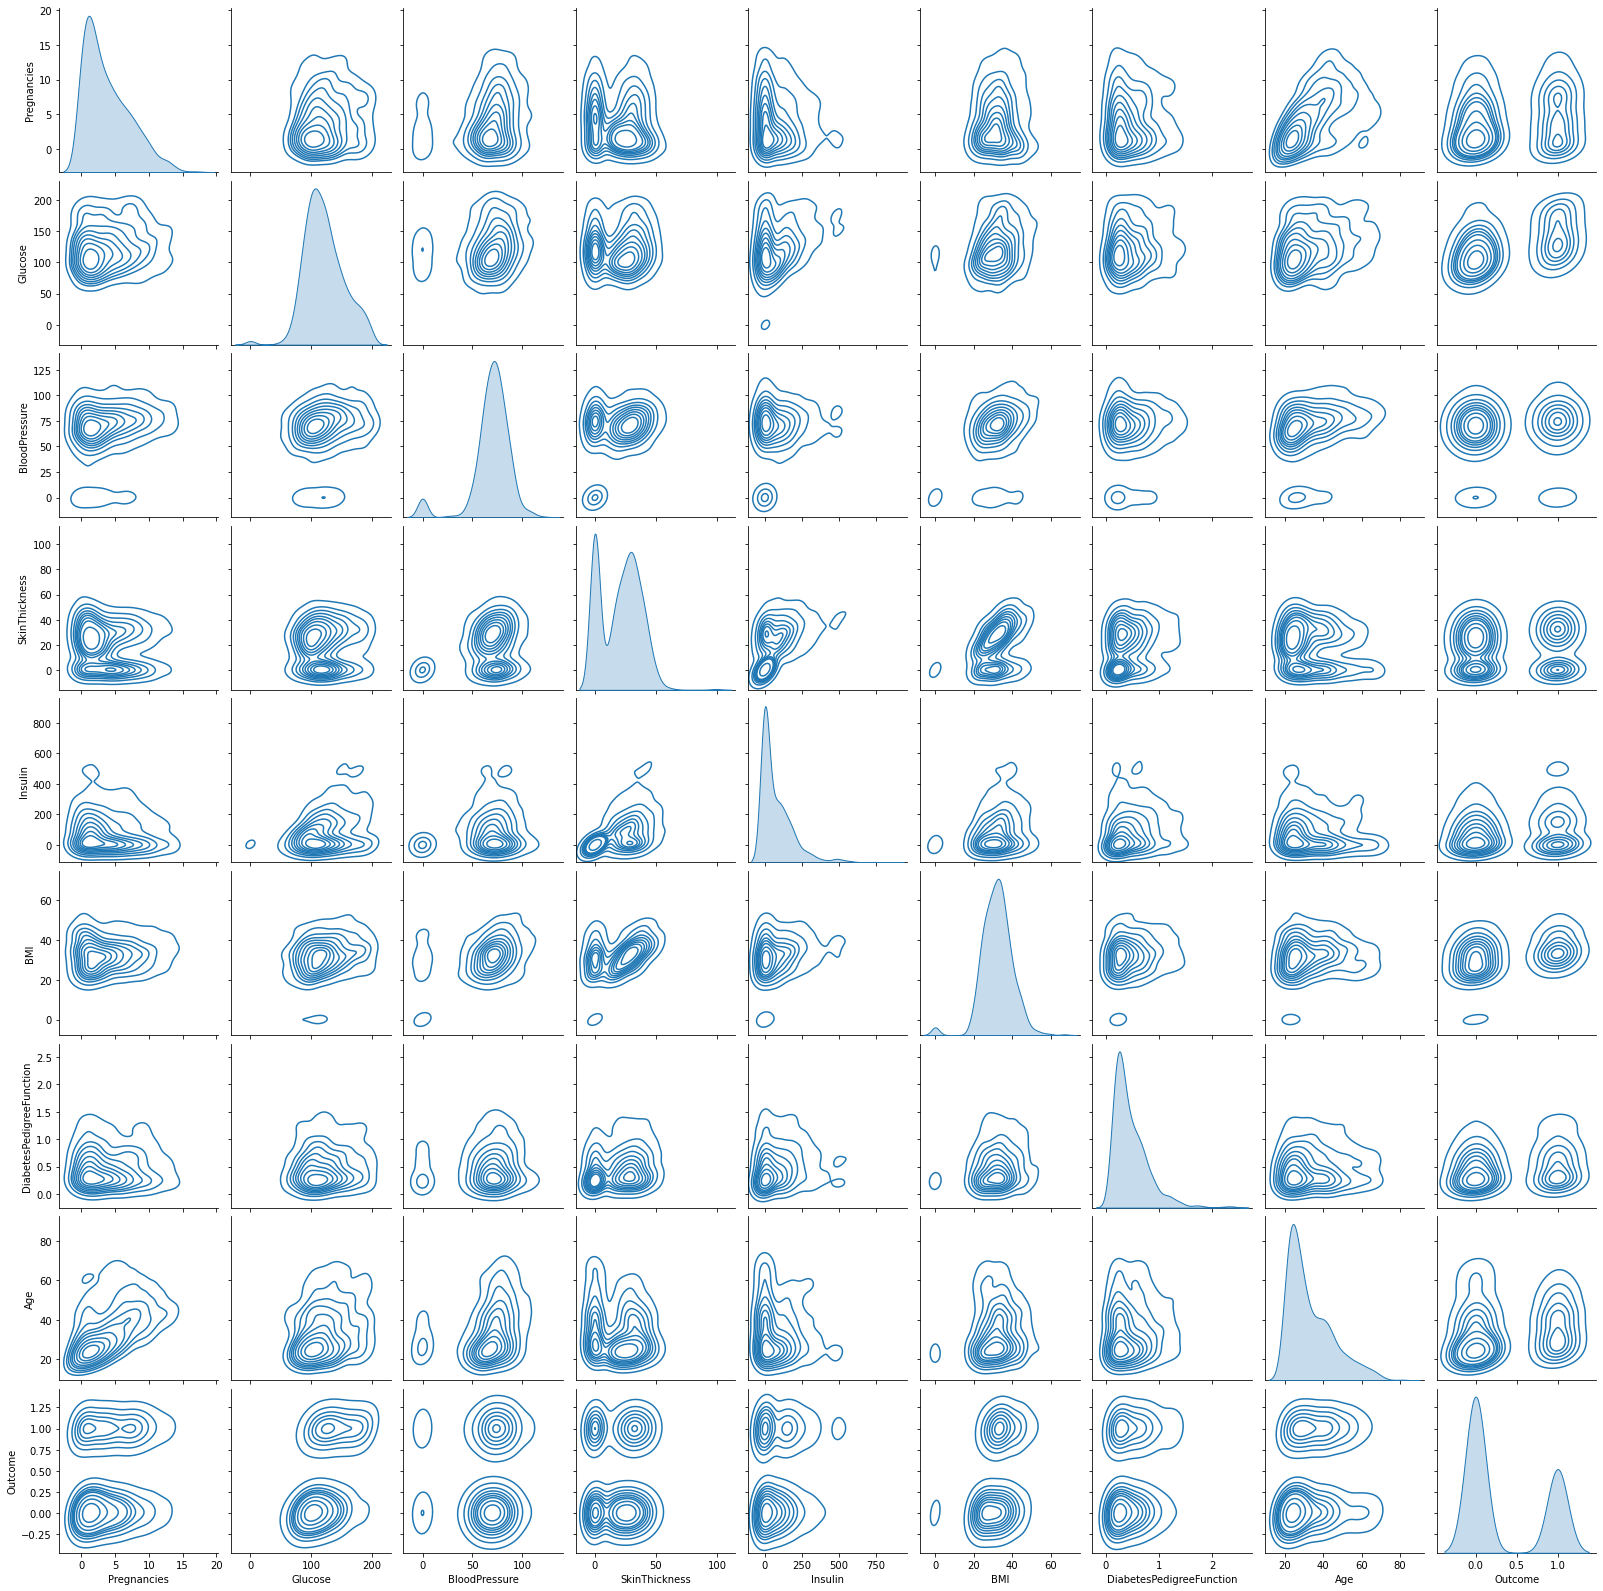

In [12]:
sns.pairplot(df,kind='kde')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

In [20]:
def model_eval(algo, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train)
    
    y_train_pred = algo.predict(X_train)
    y_train_pred_proba = algo.predict_proba(X_train)[:, 1]

    cm = confusion_matrix(y_train, y_train_pred)
    print('Train dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_train, y_train_pred))
    print('Precision :',precision_score(y_train, y_train_pred))
    print('Recall :', recall_score(y_train, y_train_pred))
    print('AUC score :', roc_auc_score(y_train, y_train_pred_proba))
    print('F1 score :', f1_score(y_train, y_train_pred))
    
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_pred_proba)

    plt.plot(fpr_train,fpr_train)
    plt.plot(fpr_train,tpr_train)
    plt.show()
    
    
    y_test_pred = algo.predict(X_test)
    y_test_pred_proba = algo.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_test_pred)
    print('\n\nTest dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_test, y_test_pred))
    print('Precision :',precision_score(y_test, y_test_pred))
    print('Recall :', recall_score(y_test, y_test_pred))
    print('AUC score :', roc_auc_score(y_test, y_test_pred_proba))
    print('F1 score :', f1_score(y_test, y_test_pred))
    
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred_proba)

    plt.plot(fpr_test,fpr_test)
    plt.plot(fpr_test,tpr_test)
    plt.show()

C:\Users\PRANAY\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train dataset :

Confusion matrix:
 [[310  39]
 [ 78 110]]
Accuracy : 0.7821229050279329
Precision : 0.738255033557047
Recall : 0.5851063829787234
AUC score : 0.8497835761750899
F1 score : 0.6528189910979229


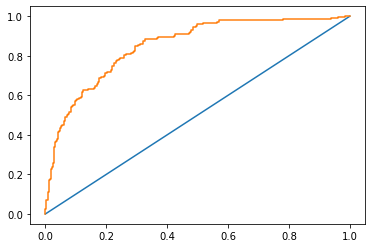



Test dataset :

Confusion matrix:
 [[121  30]
 [ 30  50]]
Accuracy : 0.7402597402597403
Precision : 0.625
Recall : 0.625
AUC score : 0.8002483443708608
F1 score : 0.625


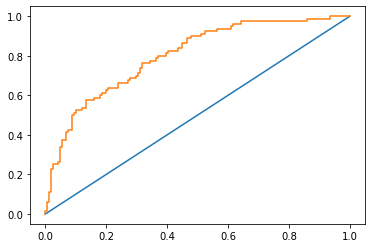

In [21]:
logr = LogisticRegression()
model_eval(logr)

In [22]:
import statsmodels.api as sm

In [23]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              61.52
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                    1.00e-70
Time:                        11:42:35   Log-Likelihood:                         -303.57
No. Observations:                 537   AIC:                                      623.1
Df Residuals:                     529   BIC:                                      657.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0156      0.007      2.309      0.021       0.002       0.029
Glucose                      0.0036      0.001      5.856      0.000       0.002       0.005
BloodPressure               -0.0051      0.001     -4.904      0.000      -0.007      -0.003
SkinThickness               -0.0008      0.001     -0.509      0.611      -0.004       0.002
Insulin                    9.81e-05      0.000      0.513      0.608      -0.000       0.000
BMI                          0.0052      0.002      2.130      0.034       0.000       0.010
DiabetesPedigreeFunction     0.0377      0.056      0.675      0.500      -0.072       0.148
Age                          0.0017      0.002      0.885      0.377      -0.002       0.006
==============================================================================
Omnibus:                      328.492   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.393
Skew:                           0.561   Prob(JB):                     1.27e-13
Kurtosis:                       1.819   Cond. No.                         561.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

Train dataset :

Confusion matrix:
 [[349   0]
 [  0 188]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


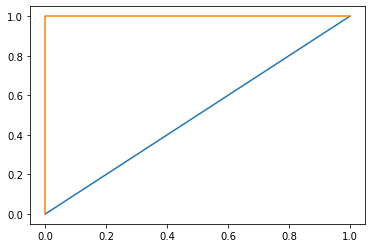



Test dataset :

Confusion matrix:
 [[121  30]
 [ 27  53]]
Accuracy : 0.7532467532467533
Precision : 0.6385542168674698
Recall : 0.6625
AUC score : 0.8056291390728475
F1 score : 0.6503067484662576


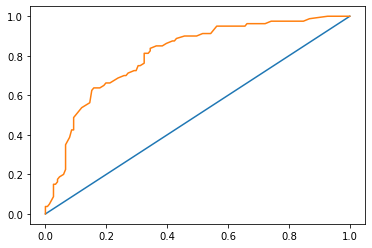

In [26]:
rfc = RandomForestClassifier(random_state=42)
model_eval(rfc)

# XGBClassifier

In [27]:
from xgboost import XGBClassifier

Train dataset :

Confusion matrix:
 [[349   0]
 [  0 188]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


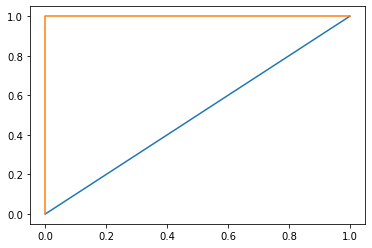



Test dataset :

Confusion matrix:
 [[116  35]
 [ 26  54]]
Accuracy : 0.7359307359307359
Precision : 0.6067415730337079
Recall : 0.675
AUC score : 0.783360927152318
F1 score : 0.6390532544378699


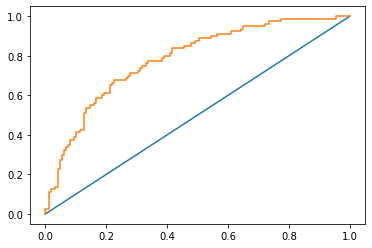

In [28]:
xgb = XGBClassifier()
model_eval(xgb)

# best output from predcition is randomforestclassifier

Train dataset :

Confusion matrix:
 [[349   0]
 [  0 188]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


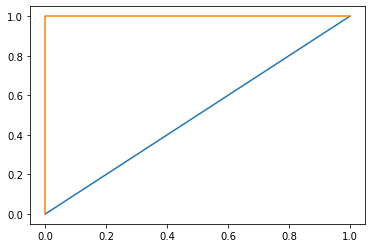



Test dataset :

Confusion matrix:
 [[121  30]
 [ 27  53]]
Accuracy : 0.7532467532467533
Precision : 0.6385542168674698
Recall : 0.6625
AUC score : 0.8056291390728475
F1 score : 0.6503067484662576


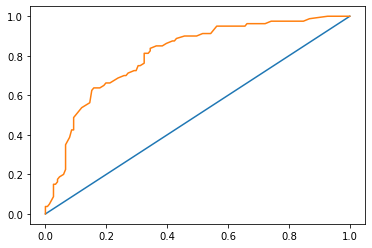

In [30]:
rfc = RandomForestClassifier(random_state=42)
model_eval(rfc)